<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/RICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
train_image_files_path = "/content/drive/MyDrive/Rice/Train" 
valid_image_files_path = "/content/drive/MyDrive/Rice/Valid" 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [4]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(150, 150),               
    class_mode='categorical')

Found 1500 images belonging to 5 classes.
Found 300 images belonging to 5 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_generator,epochs=10,batch_size=128,verbose=1, validation_data=validation_generator)

Epoch 1/10
47/47 [==============================] - 790s 17s/step - loss: 0.4279 - accuracy: 0.8347 - val_loss: 0.0864 - val_accuracy: 0.9733
Epoch 2/10
47/47 [==============================] - 77s 2s/step - loss: 0.0784 - accuracy: 0.9673 - val_loss: 0.0624 - val_accuracy: 0.9667
Epoch 3/10
47/47 [==============================] - 79s 2s/step - loss: 0.0603 - accuracy: 0.9780 - val_loss: 0.0971 - val_accuracy: 0.9567
Epoch 4/10
47/47 [==============================] - 77s 2s/step - loss: 0.0733 - accuracy: 0.9733 - val_loss: 0.0505 - val_accuracy: 0.9767
Epoch 5/10
47/47 [==============================] - 79s 2s/step - loss: 0.0467 - accuracy: 0.9833 - val_loss: 0.1527 - val_accuracy: 0.9400
Epoch 6/10
47/47 [==============================] - 88s 2s/step - loss: 0.0569 - accuracy: 0.9807 - val_loss: 0.0880 - val_accuracy: 0.9667
Epoch 7/10
47/47 [==============================] - 83s 2s/step - loss: 0.0522 - accuracy: 0.9800 - val_loss: 0.0984 - val_accuracy: 0.9600
Epoch 8/10
47/47 [

<function matplotlib.pyplot.show(*args, **kw)>

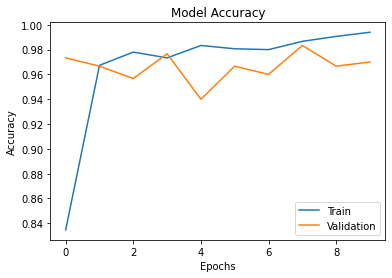

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [11]:
model.save("Rice.h5")

In [12]:
from tensorflow.keras.models import load_model
model_rice=load_model('Rice.h5')

1/1 [==============================] - 0s 127ms/step
Đây là : Basmati


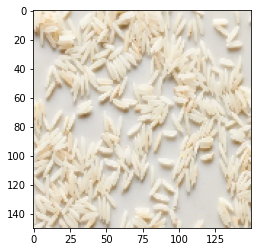

In [14]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
img = load_img('/content/basmati.png',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_rice.predict(img)
class_name=['Arborio','Basmati','Ipsala','Jamine','Karacadag']
m= int(np.argmax(result,axis=1))
print("Đây là :", class_name[m])

In [ ]:
!jupyter nbconvert --to html "/content/VNMONEY.ipynb"

[NbConvertApp] Converting notebook /content/VNMONEY.ipynb to html
[NbConvertApp] Writing 1779372 bytes to /content/VNMONEY.html
